# Analyzing United States tornadoes

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Connect-your-GIS" data-toc-modified-id="Connect-your-GIS-1">Connect your GIS</a></span></li><li><span><a href="#Who-has-suffered-the-most?" data-toc-modified-id="Who-has-suffered-the-most?-2">Who has suffered the most?</a></span></li><li><span><a href="#Visualize-which-states-have-had-the-most-tornadoes." data-toc-modified-id="Visualize-which-states-have-had-the-most-tornadoes.-3">Visualize which states have had the most tornadoes.</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4">Conclusion</a></span></li></ul></div>

Tornadoes occur in many parts of the world, including Australia, Europe, Africa, Asia, and South America, but they are found most frequently in the United States. Outside the United States, two of the highest concentrations of tornadoes are found in Argentina and Bangladesh.

Tornadoes are the most violent of all atmospheric storms and in the United States alone have caused an average of more than 80 deaths and 1,400 injuries each year (based on 1950–2011 data). A tornado is a narrow, violently rotating column of air that extends from the base of a thunderstorm to the ground. Tornado formation is complex, and no two tornadoes are the same; however, they need certain conditions to form, including intense or unseasonable heat. Wind speed within a tornado can vary from just above 0 mph up to 70 mph, with an average of 30 mph (NOAA). The Fujita damage scale is used to quantify the intensity of a tornado.

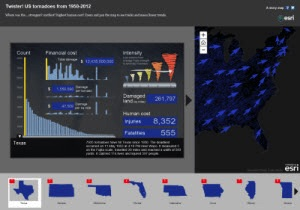

Explore the map of tornadoes across the United States: Twister! United States tornadoes from 1950 to 2012. Which states have had the most tornadoes? Using tornado location data from the United States severe weather report database, provided by the National Oceanic and Atmospheric Administration (NOAA)/National Weather Service Storm Prediction Center (http://www.spc.noaa.gov/gis/svrgis/), you can find the total number of tornadoes by state.

## Connect your GIS

In [1]:
from arcgis.gis import GIS

To create the GIS object, we pass in the url and our login credentials as shown below

In [28]:
gis = GIS('home')

`Search`
for the title: **tornado_lyr** layer.You can search the GIS for feature layer collections by specifying the item type as 'Feature Layer Collection' or 'Feature Layer'. You can also mention the owner name of the layer to get better search results.

In [29]:
data = gis.content.search('Tornadoes_and_Tracks',
                          'Feature layer', outside_org=True)

Display the list of results.

<Item title:"Tornado Tracks (NWS Damage Assessment Toolkit, filtered for after 12/31/24) - 164fe" type:Feature Layer Collection owner:pdoherty_napsg>
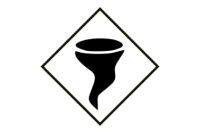

<Item title:"Tornado Tracks" type:Feature Layer Collection owner:Federal_User_Community>
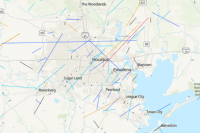

<Item title:"May 3 1999 vs May 20 2003_WFL1" type:Feature Layer Collection owner:ATFeig>
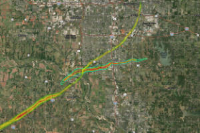

<Item title:"Map 2_ Proximity of Partner Companies to Natural Hazards _ EB Lab 6 _2__WFL1" type:Feature Layer Collection owner:10790568_FoothillGIST>
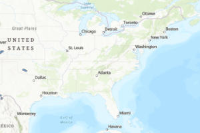

<Item title:"Delaware Tornado Tracks" type:Feature Layer Collection owner:noraluc_udel>
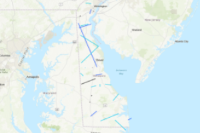

<Item title:"Tornado Tracks and Human Injuries Map_WFL1" type:Feature Layer Collection owner:gokaylee_utoronto>
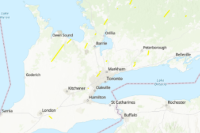

<Item title:"Tuscaloosa Tornado" type:Feature Layer Collection owner:W_Faletti>
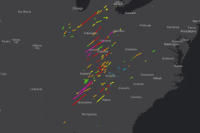

<Item title:"Torn_1990_2022" type:Feature Layer Collection owner:kolvoora_JMU>
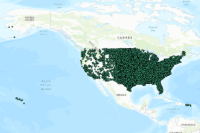

<Item title:"Tornado Tracks Map_WFL1" type:Feature Layer Collection owner:neecaro1_utoronto>
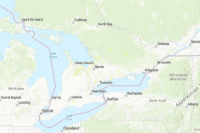

<Item title:"Ontario Tornado Tracks Map 1980_2009_WFL1" type:Feature Layer Collection owner:gacesara_utoronto>
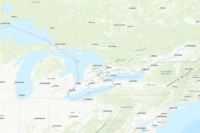

In [30]:
from IPython.display import display

for item in data:
    display(item)

Get the first item from the results.

In [31]:
item = data[7] #tornado_lyr 

The code below cycles through the layers and print their names.

In [33]:
for lyr in item.layers:
    print(lyr.properties.name)
tornlyr = item.layers[0] #tornado_lyr

Torn_1990_2022


Since the item is a Feature Layer Collection, accessing the layers property gives us a list of FeatureLayer objects. The StatePop_5011 layer is the first layer in this item.

<Item title:"Torn_1990_2022" type:Feature Layer Collection owner:kolvoora_JMU>
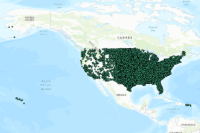

In [69]:
tornado_items = gis.content.search('Tornadoes_and_Tracks',
                          'Feature layer', outside_org=True)
tornado_items[7]

In [71]:
tnlyr = tornado_items[7]

In [65]:
#StatePop_5011
state_itms = gis.content.search('states',
                          'Feature layer', outside_org=True)


In [74]:
boundary = state_itms[7] #StatePop_5011
bnd = boundary.layers[0]

In [59]:
#Tornadoes_5011
tornlyr

<FeatureLayer url:"https://services1.arcgis.com/OoHBsnqevYljcMGr/arcgis/rest/services/Torn_1990_2022/FeatureServer/0">

`Aggregate_points` tool summarizes data from spot measurements by area. To learn more about this tool and the formula it uses, refer to the documentation <a href="http://doc.arcgis.com/en/arcgis-online/analyze/aggregate-points.htm">here</a>.

In [56]:
from arcgis.features.summarize_data import aggregate_points
from datetime import datetime as dt

Please change the output_name if this is not the first you run the cell below.

In [75]:
agg_points = aggregate_points(point_layer=tnlyr, 
                              polygon_layer=bnd, 
                              keep_boundaries_with_no_points=True,
                              output_name="agg_tornado_points" + str(dt.now().microsecond))

Exception: Unexpected character ('<' (code 60)): expected a valid value (JSON String, Number, Array, Object or token 'null', 'true' or 'false')
 at [Source: REDACTED (`StreamReadFeature.INCLUDE_SOURCE_IN_LOCATION` disabled); line: 1, column: 2]
(Error Code: 498)

In [ ]:
agg_points

<Item title:"agg_tornado_points334948" type:Feature Layer Collection owner:arcgis_python>

In [12]:
agg_lyr = agg_points.layers[0]

The GIS object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call ``gis.map()`` and assign it to a variable.

In [41]:
m1 = gis.map('US')
m1

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

In [44]:
m1.content.add(state_itms[4].layers[0])


## Who has suffered the most?

There can be many devastating effects from a tornado, including loss of life, injuries, property damage, and financial losses. To identify populations that have been affected by tornadoes, you can aggregate the number of tornadoes to the state level and normalize by population.

In [46]:
m2 = gis.map('US')
m2

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

![](tornado_img/5.PNG)

In [15]:
m2.add_layer(agg_lyr, {
               "renderer":"ClassedColorRenderer",
               "field_name":"AvgPop",
               "opacity":0.7
              })

In [16]:
m2.legend = True

Feature layers hosted can be easily read into a Spatially Enabled DataFrame using the from_layer method. Once you read it into a SEDF object, you can create reports, manipulate the data, or convert it to a form that is comfortable and makes sense for its intended purpose.

In [13]:
import pandas as pd
sdf = pd.DataFrame.spatial.from_layer(agg_lyr)

In [14]:
sdf.head()

,OBJECTID,Point_Count,STATE,NAME,Average,AvgPop,Shape__Area,Shape__Length,AnalysisArea,SHAPE
0,1,2,11,District of Columbia,6.739205e+05,673921,2.926874e+08,8.181751e+04,68.337318,"{""rings"": [[[-8575619.3133, 4720462.3076], [-8..."
1,2,56,10,Delaware,6.099492e+05,609949,8.695500e+09,5.644359e+05,2025.151926,"{""rings"": [[[-8402132.4511, 4824614.7585], [-8..."
2,3,9,44,Rhode Island,9.550124e+05,955012,5.129735e+09,6.600487e+05,1104.035392,"{""rings"": [[[-7946174.496, 5146505.0916], [-79..."
3,4,89,09,Connecticut,3.027383e+06,3027380,2.312863e+10,7.524141e+05,4986.287282,"{""rings"": [[[-8132251.0361, 5166952.3], [-8127..."
4,5,137,34,New Jersey,7.269192e+06,7269190,3.456939e+10,1.097677e+06,7780.021177,"{""rings"": [[[-8263743.7337, 5033439.7722], [-8..."


In [15]:
sdf.shape

(51, 10)

## Visualize which states have had the most tornadoes.

In [16]:
sdf.sort_values(by='Point_Count', ascending=False, axis=0, inplace=True)

In [17]:
df = sdf[0:10]

In [18]:
import matplotlib.pyplot as plt

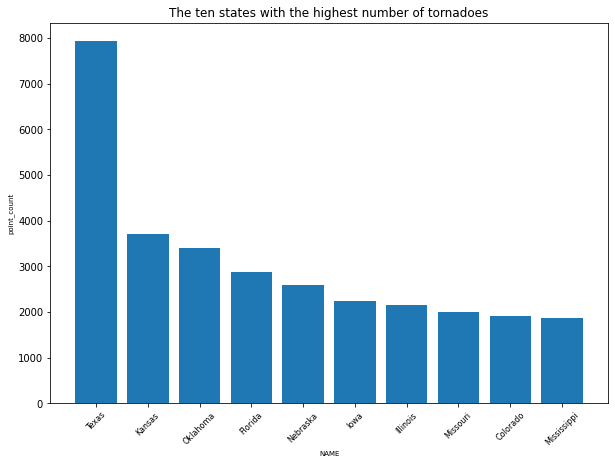

In [19]:
plt.figure(figsize=(10,7))
plt.bar(df.NAME, df.Point_Count)
plt.xlabel('NAME', fontsize=7)
plt.ylabel('point_count', fontsize=7)
plt.xticks(fontsize=8, rotation=45)
plt.title('The ten states with the highest number of tornadoes')
plt.show()

Number of tornadoes by state, 1950–2011

Some states are subject to many more tornadoes than others. Over a 62-year period (1950–2011), Texas had by far the most tornadoes (with 7,935), followed by Kansas (with 3,713), while others such as Vermont, Rhode Island, and the District of Columbia had fewer than 50. The ten states shown in the graph below had 20 percent of the total number of tornadoes.

## Conclusion

In this notebook, we demonstrate how to use aggregation analysis to summarize the number of data points within each polygon. Thus, using `aggregate_points()` method, we arrive at the number of tornadoes that hit each state. and published the aggregation results as an online service. Mapping results often show new insights that lead to deeper understanding and more clearly defined analysis.